## Fourier Methods Lab

Below is some boilerplate code for calculating the FFT with NumPy and comparing to the oscilloscope fft channel. Also for calculating area under power spectrum graphs, and calculating variances.

The folders before `ALL0044` have FFTs who are not centered on the origin. The data processing for these will be annoying. Use a `...CH1.csv` file at or later than `ALL0044`, and its corresponding `FFT.csv` files.

This Notebook uses `F0044CH1.CSV` as an example. Its transform is then `F0045FFT.CSV`.

<img src='Data/ALL0044/F0044TEK.BMP' width='600'>

Move/cut the metadata from the top of the `.csv` file and save it somewhere else (or copy the data and save it to a new file). This way, we still know the units and scales for the y-axis and x-axis, and the `.csv` file becomes easier to work with.

For `F0044CH1.CSV`, its metadata is recorded in the cell below. The "cleaned" file is `trim44CH1.CSV`

````Record Length,2.500000e+03,,  -0.000244000000,-2680.00000,
Sample Interval,4.000000e-07,,  -0.000243600000,-2680.00000,
Trigger Point,6.100000000000e+02,,  -0.000243200000,-2680.00000,
,,,  -0.000242800000,-2680.00000,
,,,  -0.000242400000,-2640.00000,
,,,  -0.000242000000,-2680.00000,
Source,CH1,,  -0.000241600000,-2680.00000,
Vertical Units,V,,  -0.000241200000,-2680.00000,
Vertical Scale,1.000000e+03,,  -0.000240800000,-2640.00000,
Vertical Offset,0.000000e+00,,  -0.000240400000,-2640.00000,
Horizontal Units,s,,  -0.000240000000,-2680.00000,
Horizontal Scale,1.000000e-04,,  -0.000239600000,-2680.00000,
Pt Fmt,Y,,  -0.000239200000,-2680.00000,
Yzero,0.000000e+00,,  -0.000238800000,-2720.00000,
Probe Atten,5.000000e+02,,  -0.000238400000,-2680.00000,
Model Number,TBS1202B-EDU,,  -0.000238000000,-2680.00000,
Serial Number,C030451,,  -0.000237600000,-2680.00000,
Firmware Version,FV:v4.06,,  -0.000237200000,-2640.00000,
``

In [9]:
import pandas as pd

df = pd.read_csv('Data/ALL0044/trim44CH1.CSV', header=None)
df = pd.DataFrame([df[3], df[4]]).T
df.head()

,3,4
0,-0.000237,-2640.0
1,-0.000236,-2640.0
2,-0.000236,-2680.0
3,-0.000236,-2600.0
4,-0.000235,-2680.0


Only columns 3 and 4 are used. Make a DataFrame from this.

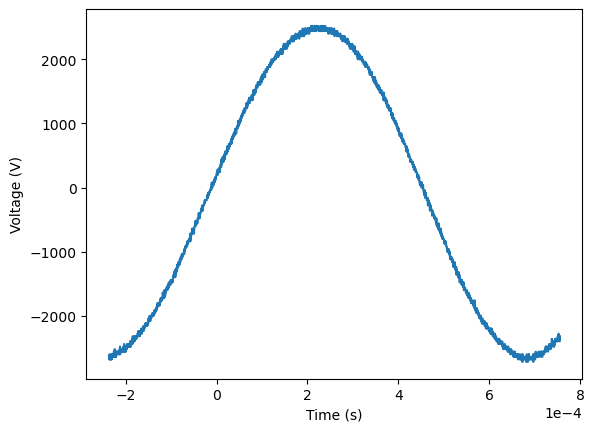

In [10]:
import matplotlib.pyplot as plt

plt.plot(df[3], df[4])
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

When the input $a$ is a time-domain signal and `A = fft(a)`, `np.abs(A)` is its amplitude spectrum and `np.abs(A)**2` is its power spectrum.
From [NumPy documentation](https://numpy.org/doc/stable/reference/routines.fft.html).

Text(0.5, 0, 'Frequency (Hz)')

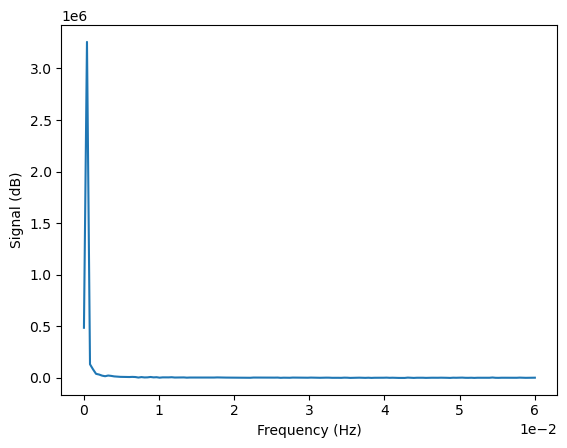

In [11]:
import numpy as np

sp = np.fft.fft(df[4])
freq = np.fft.fftfreq(len(df[3]))

plt.plot(freq[:150], np.abs(sp[:150]))
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ylabel('Signal (dB)')
plt.xlabel('Frequency (Hz)')

### Side Tangent: Round-Off "Low" Values to Zero

In [25]:
pd.Series(np.abs(sp.real)).describe()

count    2.482000e+03
mean     3.728176e+03
std      9.019637e+04
min      4.191190e+00
25%      2.972091e+02
50%      6.507314e+02
75%      1.106591e+03
max      3.157111e+06
dtype: float64

In [38]:
copy = pd.Series(np.abs(sp.real))
for i in range(len(copy)):
    if copy[i] < 500:
        copy[i] = 0

What was the actual FFT from the oscilloscope? (We'll need to do some image editing to mirror it on y-axis).

<img src='Data/ALL0045/F0045TEK.BMP' width='600'>

Calculation of the integral using trapezoidal approximation.

In [12]:
pow_sp = np.abs(sp)**2

integral_FT = np.trapz(pow_sp, freq)
integral_FT

6482033000.084005

In [13]:
# Integrate absolute square of time-domain signal
abs_sq = np.abs(df[4])**2
integral_signal = np.trapz(abs_sq, df[3])
integral_signal

3464.05504

## Wrong Version of Plancherel's Theorem
Must use the version that's valid for the Discrete Fourier Transform

In [41]:
np.sum(np.abs(df[4])**2)

8666313600.0

In [42]:
(1/len(sp))*np.sum(np.abs(sp)**2)

8666313600.0

In [55]:
# Get number of non-zero entries in signal
nonzero_signal = np.count_nonzero(df[4].values)
# Do the same for the FFT
nonzero_FFT = np.count_nonzero(np.array(copy))

In [56]:
# Check inequality
N = len(df[4])
nonzero_FFT * nonzero_signal

3728739

In [57]:
N

2482